Context

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

Detailed Column Descriptions
bank client data:

1. - age (numeric)
2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. - education (categorical: "unknown","secondary","primary","tertiary")
5. - default: has credit in default? (binary: "yes","no")
6. - balance: average yearly balance, in euros (numeric)
7. - housing: has housing loan? (binary: "yes","no")
8. - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:
9. - contact: contact communication type (categorical: "unknown","telephone","cellular")
10. - day: last contact day of the month (numeric)
11. - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. - duration: last contact duration, in seconds (numeric)
# other attributes:
13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. - previous: number of contacts performed before this campaign and for this client (numeric)
16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17. - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [187]:
b_train = pd.read_csv("train.csv", sep=";") #removes the delimiter ";"
b_train.set_index
b_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis

In [188]:
df1 = b_train[["marital","housing","balance"]].groupby(["marital","housing"]).mean()
df1

balance
marital  housing             
divorced no       1353.623478
         yes      1040.610251
married  no       1714.105020
         yes      1202.224920
single   no       1453.831012
         yes      1171.544190

Text(0, 0.5, 'balance')

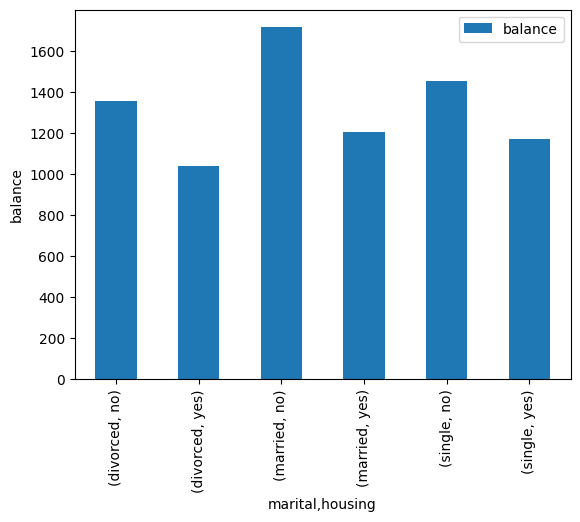

In [189]:
df1.plot(kind="bar")
plt.ylabel("balance")

<AxesSubplot: xlabel='marital'>

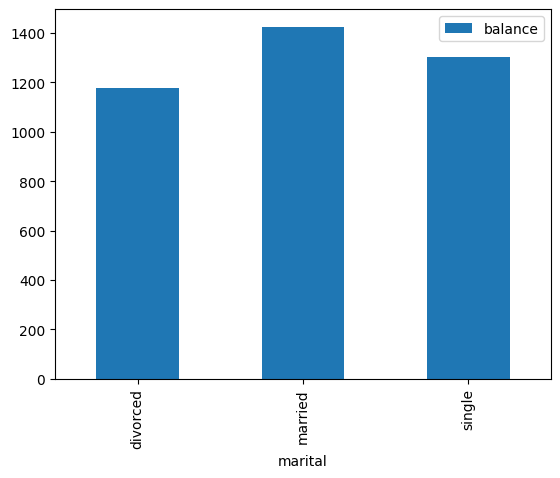

In [190]:
df = b_train[["marital","balance"]]
marital = df.groupby(["marital"]).mean()
marital.plot(kind="bar")
#sns.barplot(x="marital", y="balance", data=marital)

C:\Users\Oabo Nwako\AppData\Local\Temp\ipykernel_7908\1225323252.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b_train["balance"])


(-20.0, 20000.0)

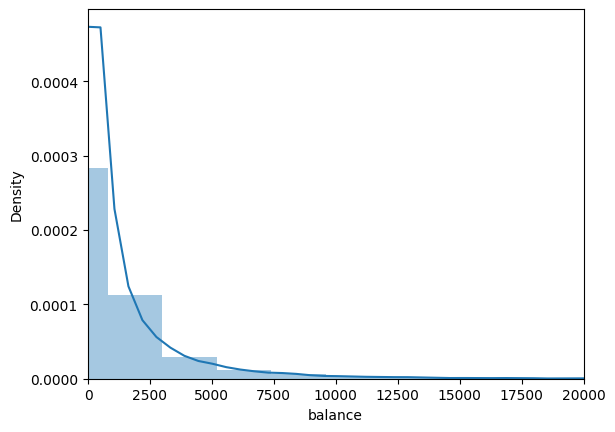

In [191]:
#plt.hist(b_train["age"], bins=15)
sns.distplot(b_train["balance"])
plt.xlim(-20,20000)

C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


(0.0, 20000.0)

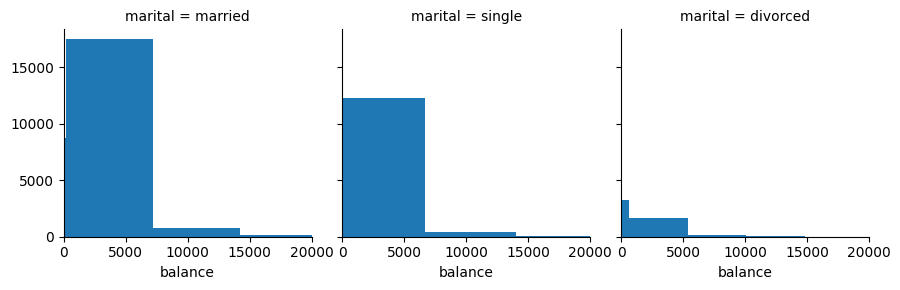

In [192]:
grid = sns.FacetGrid(b_train, col="marital")
grid.map(plt.hist, "balance", bins=15)
plt.xlim(0,20000)

<AxesSubplot: xlabel='age', ylabel='balance'>

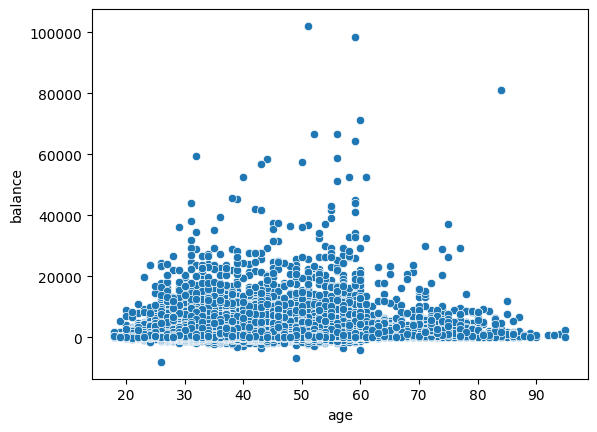

In [193]:
sns.scatterplot(x="age", y="balance", data=b_train)

C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Pac

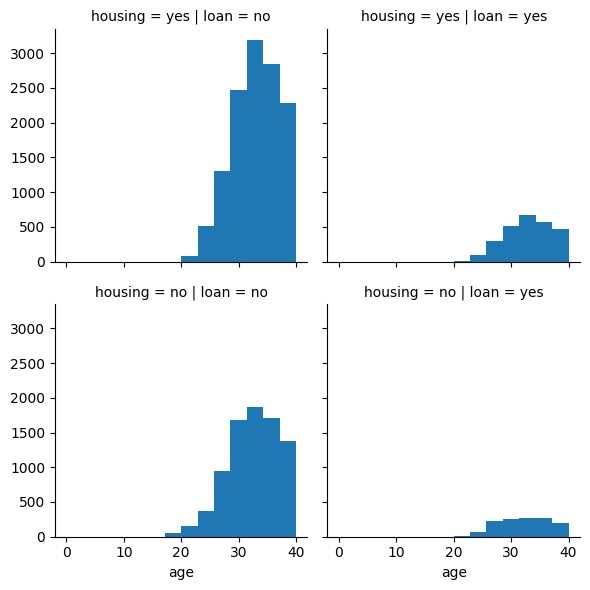

In [194]:
grid = sns.FacetGrid(b_train, row="housing", col="loan")
grid.map(plt.hist, "age", bins=np.linspace(0,40,15))


C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Pac

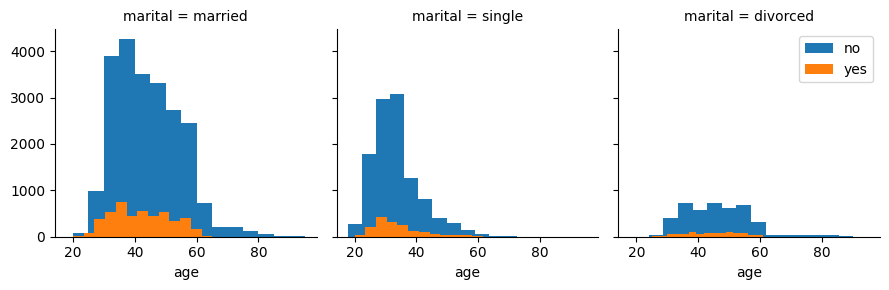

In [195]:
grid = sns.FacetGrid(b_train, hue="loan", col="marital", col_wrap=3)
grid.map(plt.hist, "age", bins=15)
grid.axes[-1].legend()
plt.show()

In [196]:
b_train.groupby("education")["loan"].value_counts(normalize=True)

education  loan
primary    no      0.850533
           yes     0.149467
secondary  no      0.814542
           yes     0.185458
tertiary   no      0.865875
           yes     0.134125
unknown    no      0.928379
           yes     0.071621
Name: loan, dtype: float64

C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Oabo Nwako\AppData\Local\Pac

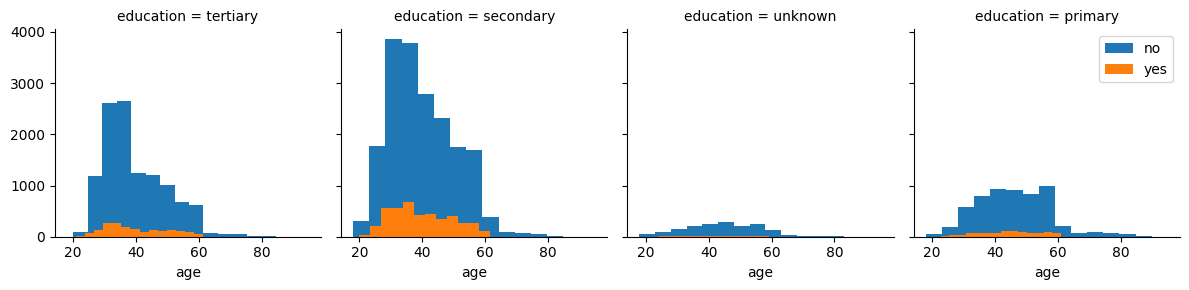

In [197]:
grid = sns.FacetGrid(b_train, col="education", hue="loan", col_wrap=4)
grid.map(plt.hist, "age", bins=15)
grid.axes[-1].legend()
plt.show()

In [198]:
b_train[["poutcome","y"]].value_counts().to_frame()

,,0
poutcome,y,
unknown,no,33573
failure,no,4283
unknown,yes,3386
other,no,1533
success,yes,978
failure,yes,618
success,no,533
other,yes,307


## Data preprocessing

In [199]:
b_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [200]:
b_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### One hot encoding

In [201]:
b_train[["default","housing","loan"]].replace(to_replace=["yes","no"], value=[1,0], inplace=True)
b_train.head()

C:\Users\Oabo Nwako\AppData\Local\Temp\ipykernel_7908\1478013154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_train[["default","housing","loan"]].replace(to_replace=["yes","no"], value=[1,0], inplace=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [202]:
features = b_train[["age","balance","duration","pdays","previous"]]
features = pd.concat([features,pd.get_dummies(b_train[["campaign","poutcome","job","marital","education","default", "housing","loan"]])],axis=1)
features.head()

,age,balance,duration,pdays,previous,campaign,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,...,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,261,-1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
1,44,29,151,-1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
2,33,2,76,-1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,1
3,47,1506,92,-1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
4,33,1,198,-1,0,1,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0


In [203]:
#turn to arrays
X = np.array(features)
y = np.array(b_train["y"])

#normalise
X = preprocessing.StandardScaler().fit_transform(X)

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
from sklearn import metrics

In [205]:
#for model evaluation
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Multi-class Classification

Predict whether customers will subscribe for a term deposit or not

### K Neighbours

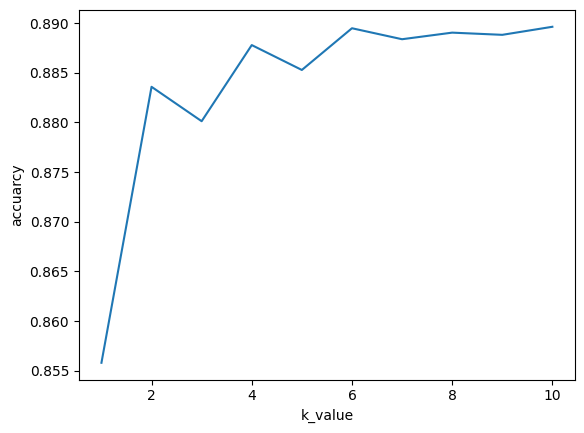

In [206]:
acc = []
k_value = [1,2,3,4,5,6,7,8,9,10]
for k in range(1,11):
    k_n = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat = k_n.predict(X_test)
    score = metrics.accuracy_score(y_test,yhat)
    acc.append(score)

#Plot suitable k_value plot
plt.figure()
plt.plot(k_value,acc)
plt.xlabel("k_value")
plt.ylabel("accuarcy")
plt.show()


In [207]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)
yhat_k = knn.predict(X_test)

### Logistics Regression

In [208]:
lr = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train,y_train)
yhat_lr = lr.predict(X_test)


### Support Vector Machine

In [209]:
clf = svm.SVC(kernel="sigmoid").fit(X_train,y_train)
yhat_s = clf.predict(X_test)

In [210]:
b_test = pd.read_csv("test.csv", sep=";")
b_test.set_index
b_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [211]:
b_test[["default","housing","loan"]].replace(to_replace=["yes","no"], value=[1,0],inplace=True)

feature = b_test[["age","balance","duration","pdays","previous"]]
feature = pd.concat([feature,pd.get_dummies(b_test[["campaign","poutcome","job","marital","education","default", "housing","loan"]])], axis=1)

X = np.array(feature)
X = preprocessing.StandardScaler().fit_transform(X)
y = np.array(b_test["y"])



C:\Users\Oabo Nwako\AppData\Local\Temp\ipykernel_7908\2464397097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_test[["default","housing","loan"]].replace(to_replace=["yes","no"], value=[1,0],inplace=True)


## Model Evaluation

In [224]:
yhat_kn = knn.predict(X)
yhat_svm = clf.predict(X)
yhat_lr = lr.predict(X)
yhat_lr_prob = lr.predict_proba(X)



In [225]:
#jaccard_score(y,yhat_lr,pos_label="yes")
#f1_score(y,yhat_lr,pos_label="yes", average="weighted")
#f1_score(y,yhat_lr,pos_label="no", average="weighted")
log_loss(y,yhat_lr_prob)

0.2600483527739412

In [226]:
dic = [
    {"Algorithm": "KNN", "Jaccard":jaccard_score(y,yhat_kn,pos_label="no"), "F1-score": f1_score(y,yhat_kn,pos_label="no", average="weighted"), "LogLoss": "NAN"},
    {"Algorithm": "SVM", "Jaccard":jaccard_score(y,yhat_svm,pos_label="no"), "F1-score": f1_score(y,yhat_svm,pos_label="no", average="weighted"), "LogLoss": "NAN"},
    {"Algorithm": "LogisticRegression", "Jaccard":jaccard_score(y,yhat_lr,pos_label="yes"), "F1-score": f1_score(y,yhat_lr,pos_label="yes", average="weighted"), "LogLoss": log_loss(y,yhat_lr_prob)}
]

report = pd.DataFrame(dic)
report

C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'no') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'no') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Oabo Nwako\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.900685,0.883854,NAN
1,SVM,0.839863,0.843316,NAN
2,LogisticRegression,0.266556,0.885912,0.260048
